# MODELO EXPONENCIAL

### AUTOR: CARLOS MOROCHO

In [1]:
#Importación de las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.optimize import curve_fit

#Obtención de los datos de COVID-19 de Ecuador
url_datos = 'DatosCOVID2020.csv'

datos = pd.read_csv(url_datos, sep = ',')
datos

,muestras,muestras_pcr,muestras_pcr_nuevas,pruebas_rezagadas,muertes_confirmadas,muertes_probables,muertes,muertes_nuevas,positivas,positivas_pcr,...,defunciones_2017,defunciones_2017_nuevas,defunciones_2016,defunciones_2016_nuevas,defunciones_2015,defunciones_2015_nuevas,hospitalizadas_altas,hospitalizadas_estables,hospitalizadas_pronostico_reservadas,created_at
0,129,129,0,106,1,0,1,0,23,23,...,14506,217,13643,212,12866,167,0,0,1,13/03/2020
1,206,206,77,178,2,0,2,1,28,28,...,14718,212,13848,205,13047,181,0,7,3,14/03/2020
2,273,273,67,236,2,0,2,0,37,37,...,14926,208,14048,200,13228,181,0,7,2,15/03/2020
3,354,354,81,296,2,0,2,0,58,58,...,15164,238,14238,190,13388,160,0,9,5,16/03/2020
4,762,762,408,651,2,0,2,0,111,111,...,15347,183,14412,174,13550,162,0,9,5,17/03/2020
5,762,762,0,282,3,0,3,1,168,168,...,15555,208,14644,232,13736,186,0,10,6,18/03/2020
6,1153,1153,391,481,4,0,4,1,260,260,...,15789,234,14858,214,13919,183,3,12,5,19/03/2020
7,1670,1670,517,711,7,0,7,3,426,426,...,16013,224,15064,206,14105,186,3,10,7,20/03/2020
8,2051,2051,381,870,7,0,7,0,532,532,...,16234,221,15267,203,14273,168,3,5,15,21/03/2020
9,2360,2360,309,699,14,0,14,7,789,789,...,16456,222,15450,183,14450,177,3,54,17,22/03/2020


In [2]:
#Se filtran los datos para obtener solo los casos positivos
datos_infectados = datos.loc[:, ['positivas', 'created_at']]

#Expresar los datos de fecha en número de dias desde el inicio de año
formato = '%d/%m/%Y'
fecha = datos_infectados['created_at']
datos_infectados['created_at'] = fecha.map(lambda x: 
    (datetime.strptime(x, formato) - datetime.strptime('01/01/2020', formato)).days
)

datos_infectados

,positivas,created_at
0,23,72
1,28,73
2,37,74
3,58,75
4,111,76
5,168,77
6,260,78
7,426,79
8,532,80
9,789,81


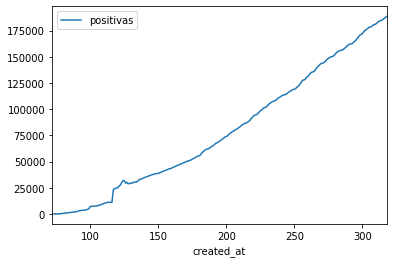

In [3]:
datos_infectados.plot(x = 'created_at', y = 'positivas')

Como se puede observar, el número de casos inicia el día 72 (13/03/2020) con 23 casos confirmados. Hasta el dia 318 (14/11/2020) se registran 188583 casos confirmados.

Predicción de casos positivos para el día 347:  590482843768204416


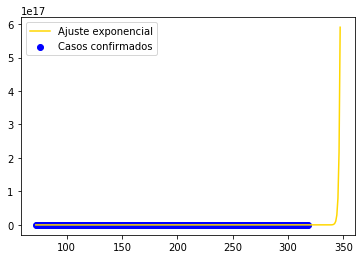

In [4]:
#Obtención de las variables para el entrenamiento
x = list(datos_infectados.iloc[:, 1]) #Fecha (Número de día)
y = list(datos_infectados.iloc[:, 0]) #Numero de infectados

#Definición del modelo exponencial
modelo_exponencial = lambda x, a, b: a + b * np.exp(x)

#Realizamos el ajuste de curva para los datos
ajuste = curve_fit(modelo_exponencial, x, y)

dias = 30
x_real = list(range(min(x), max(x) + dias)) #Realizamos la predicción para un mes

prediccion_total = [modelo_exponencial(i, ajuste[0][0], ajuste[0][1]) for i in x_real]

#Comprobación de la predicción para 30 días despues del 14/11/2020
prediccion = prediccion_total[-1]

#Gráfica de los datos y la predicción
print('Predicción de casos positivos para el día 347: ', int(prediccion))
plt.scatter(x, y, color = 'blue')
plt.plot(x_real, prediccion_total, color = 'gold')
plt.legend(('Ajuste exponencial', 'Casos confirmados'))
plt.show()

### Análisis

El modelo exponencial que se muestra en este ejemplo reacciona ante las muestras de tal manera que la cantidad de casos confirmados se vuelve demasiado grande. El crecimiento de infecciones es tanto que las muestras dan la impresión de ser aplanadas cuando se realiza la gráfica demostratica.

### Conclusiones

Mediante el presente trabajo se determina que cuando se usa el modelo exponencial, el tamaño de los datos aumenta de manera desbordada a medida que se aumentan más el valor de entrada.

### Criterio personal (Político, económico y social de la situación)

Debido a todo el caos que provoco el virus en todo el mundo, estos modelos de prediccon que si bien no son del todo exactos pueden ayudarnos a solventar algunas respuestas que todo la sociedad esta buscando, existen millones de empresas que de seguro estan desarrollando estos sistemas devido a la contingencia pero creo que ningunoo veneficia a la sociedad como la informacion como tal.